In [20]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
import numpy as np
import pandas as pd
import my_globals
import pickle
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [4]:
data = pd.read_csv('feature_space_1.csv', encoding='latin1')
y = data['target']
data = data.drop('target', axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [6]:
data.head(5)

,exclaim_freq,mention_count,cap_freq,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,...,tfidf_àª,tfidf_à¹,tfidf_ðµ,tfidf_ðµð,tfidf_ðµñ,tfidf_ðºð,tfidf_ð½ð,tfidf_ð¾,tfidf_ð¾ð,tfidf_ð¾ñ
0,0.016667,1,0.054054,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,1,0.346154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.023256,2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.018182,1,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,1,0.200000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
lg = LogisticRegression(max_iter=1000)

params={'C': [10**(n) for n in range(-4, 4)]}

clf = GridSearchCV(lg, params, scoring='accuracy', cv=5, return_train_score=True, verbose=4)
clf.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ......C=0.0001;, score=(train=0.506, test=0.499) total time=  48.1s
[CV 2/5] END ......C=0.0001;, score=(train=0.510, test=0.500) total time=  39.9s
[CV 3/5] END ......C=0.0001;, score=(train=0.508, test=0.506) total time=  56.1s
[CV 4/5] END ......C=0.0001;, score=(train=0.505, test=0.506) total time=  48.1s
[CV 5/5] END ......C=0.0001;, score=(train=0.505, test=0.500) total time=  52.8s
[CV 1/5] END .......C=0.001;, score=(train=0.511, test=0.499) total time=  50.2s
[CV 2/5] END .......C=0.001;, score=(train=0.509, test=0.502) total time=  41.7s
[CV 3/5] END .......C=0.001;, score=(train=0.516, test=0.504) total time=  58.8s
[CV 4/5] END .......C=0.001;, score=(train=0.514, test=0.504) total time=  44.4s
[CV 5/5] END .......C=0.001;, score=(train=0.516, test=0.501) total time=  38.8s
[CV 1/5] END ........C=0.01;, score=(train=0.549, test=0.496) total time= 1.0min
[CV 2/5] END ........C=0.01;, score=(train=0.550,

C:\Users\hisky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ........C=1000;, score=(train=0.603, test=0.496) total time= 6.4min


C:\Users\hisky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ........C=1000;, score=(train=0.605, test=0.495) total time= 4.6min


C:\Users\hisky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ........C=1000;, score=(train=0.602, test=0.494) total time= 5.0min


C:\Users\hisky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ........C=1000;, score=(train=0.601, test=0.503) total time= 5.0min


C:\Users\hisky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ........C=1000;, score=(train=0.602, test=0.500) total time= 4.9min


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=4)

In [24]:
def assess(y_true, y_pred):
    print("confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print()
    print("accuracy_score:")
    print(accuracy_score(y_true, y_pred))
    print()
    print("classification report:")
    print(classification_report(y_true,y_pred))
    print()


best_c = clf.best_params_["C"]
print(f"Best C choice is {best_c}.")
best_lg = clf.best_estimator_

lg_modelfile = "/".join([my_globals.DATA_DIR, "best_lg.pickle"])
pickle.dump(best_lg, open(lg_modelfile, "wb"))

best_lg.fit(X_train, y_train)
y_pred = best_lg.predict(X_test)

print("Out of sample assessment:")
print()
assess(y_test, y_pred)

Best C choice is 0.0001.
Out of sample assessment:

confusion matrix:
[[6775 3142]
 [4810 5273]]

accuracy_score:
0.6024

classification report:
              precision    recall  f1-score   support

           0       0.58      0.68      0.63      9917
           4       0.63      0.52      0.57     10083

    accuracy                           0.60     20000
   macro avg       0.61      0.60      0.60     20000
weighted avg       0.61      0.60      0.60     20000




<Axes: >

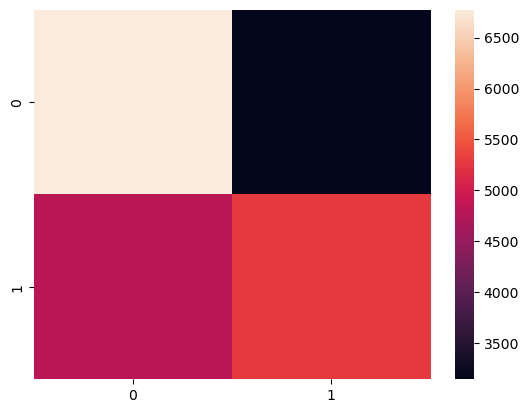

In [25]:
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat)